In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn import externals
from io import StringIO
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg 
from sklearn.tree import export_graphviz

In [6]:
df=pd.read_csv("H:\\Data Science Assignments\\Data Science Assignments\\Decision Trees\\Company_Data.csv")

In [7]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [8]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [9]:
df1 = df.copy()

In [10]:
df1.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [12]:
df1.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [14]:
df1[df1.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


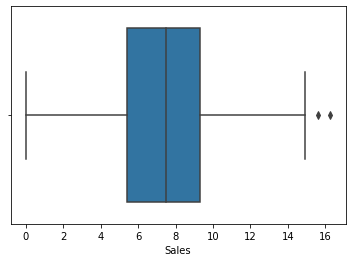

In [15]:
ax = sns.boxplot(df1['Sales'])

In [17]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.18556036318721578
Kurtosis: -0.08087736743346197


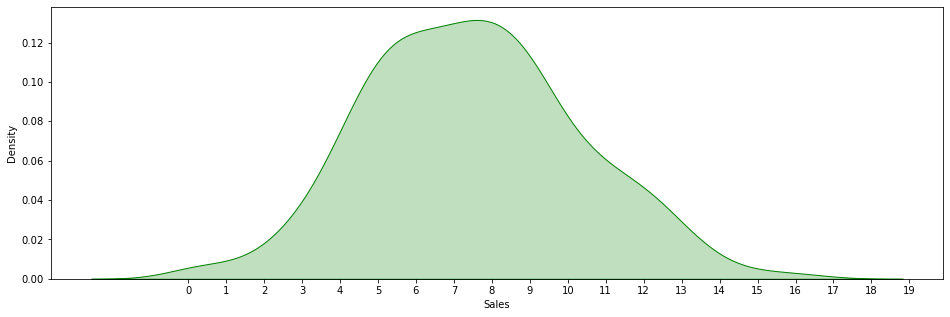

In [18]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df1['Sales'].skew()))
print("Kurtosis: {}".format(df1['Sales'].kurtosis()))
ax = sns.kdeplot(df1['Sales'],shade=True,color='g')
plt.xticks([i for i in range(0,20,1)])
plt.show()

In [19]:
obj_colum = df1.select_dtypes(include='object').columns.tolist()

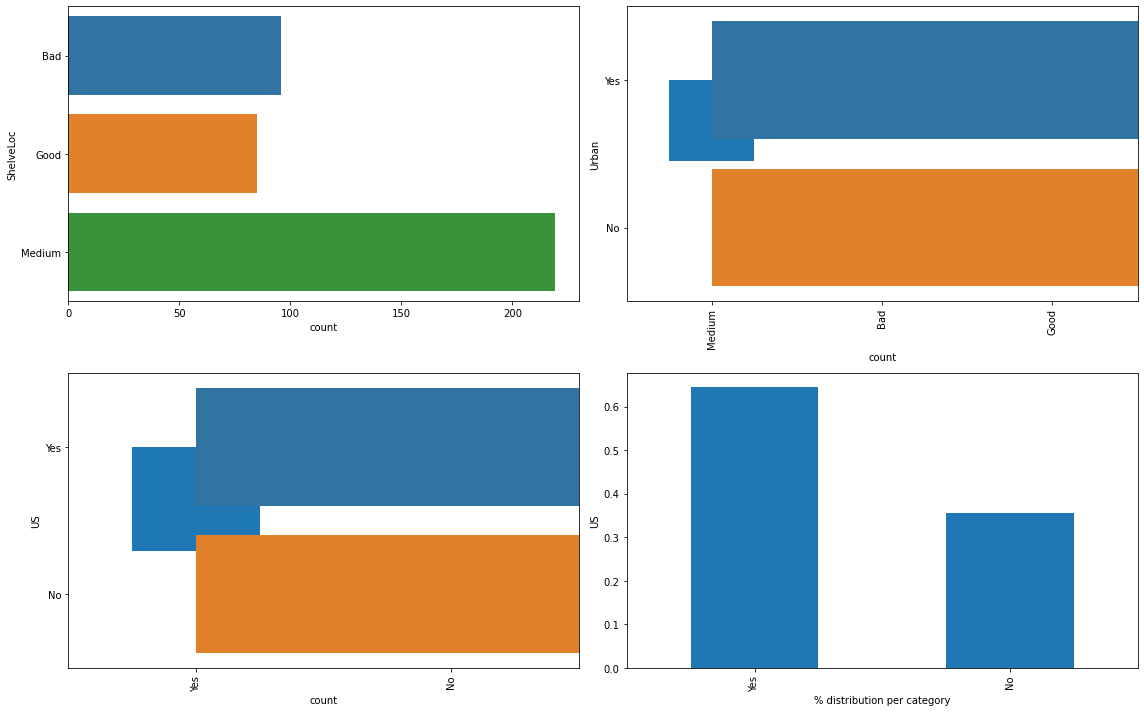

In [21]:
plt.figure(figsize=(16,10))
for i,col in enumerate(obj_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=df1,y=col)
    plt.subplot(2,2,i+1)
    df1[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

In [22]:
num_columns = df1.select_dtypes(exclude='object').columns.tolist()

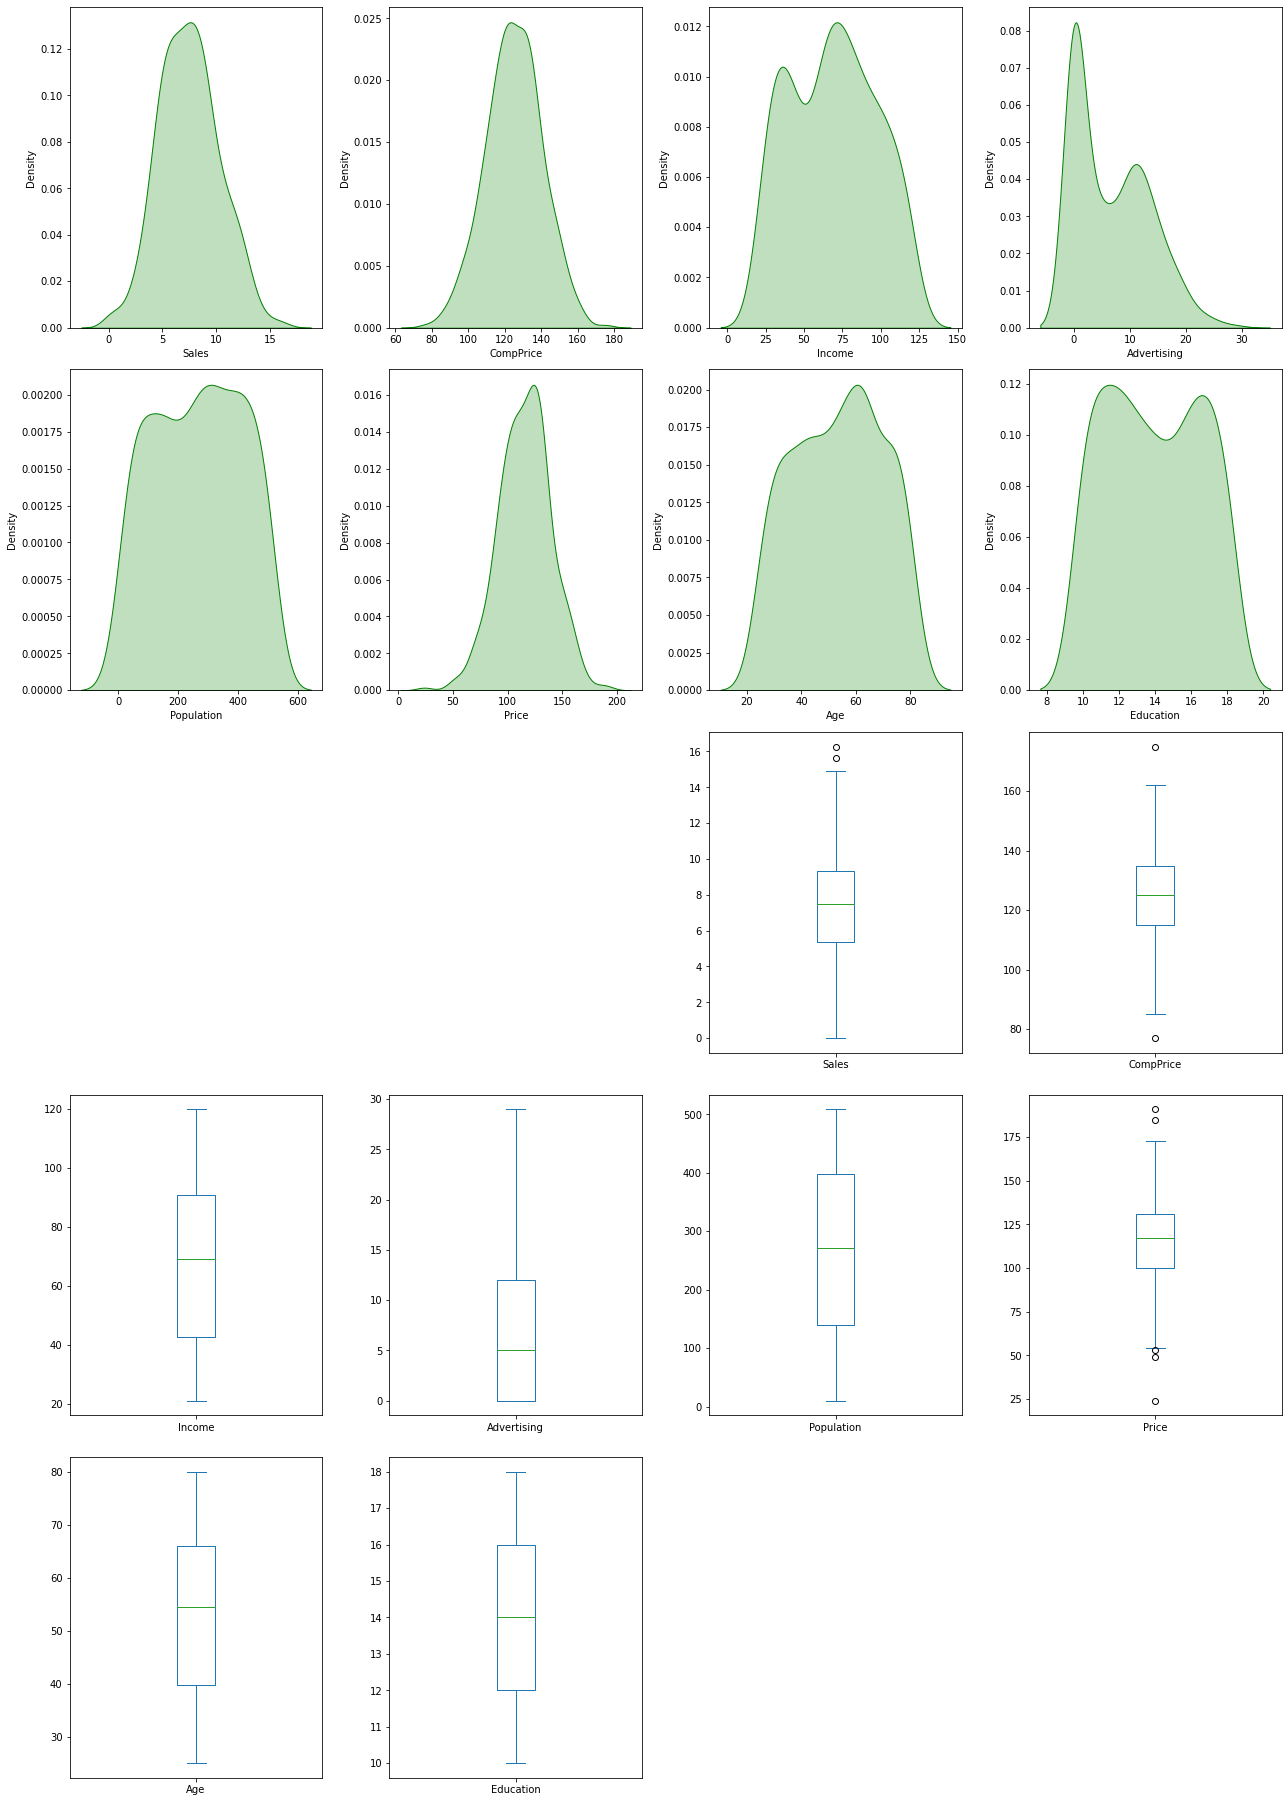

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
skewness,0.185560,-0.042755,0.049444,0.639586,-0.051227,-0.125286,-0.077182,0.044007
kurtosis,-0.080877,0.041666,-1.085289,-0.545118,-1.202318,0.451885,-1.134392,-1.298332


In [23]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

In [24]:
corr = df1.corr()

In [25]:
df1 = pd.get_dummies(df1, columns = ['ShelveLoc','Urban','US'])

In [26]:
corr = df1.corr()

<AxesSubplot:>

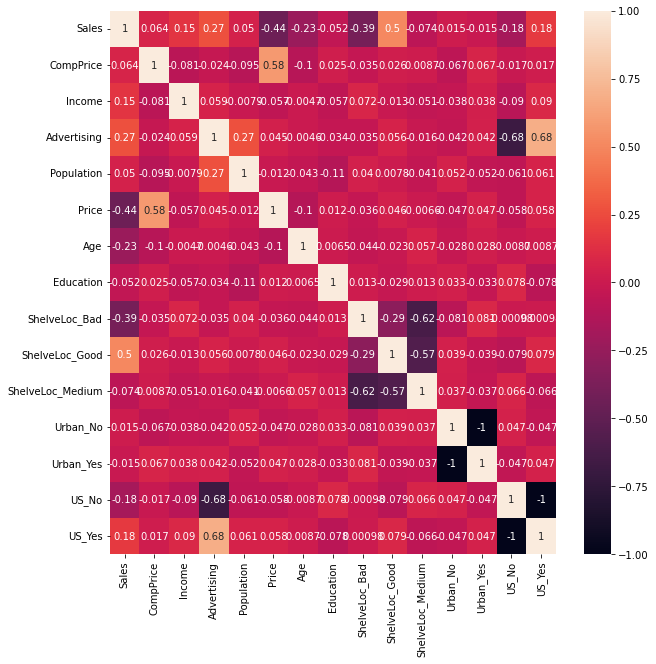

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [28]:
df1["sales"]="small"
df1.loc[df1["Sales"]>7.49,"sales"]="large"
df1.drop(["Sales"],axis=1,inplace=True)

In [29]:
X = df1.iloc[:,0:14]
y = df1.iloc[:,14]

In [30]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, stratify = y)

In [31]:
y_train.value_counts()

small    141
large    139
Name: sales, dtype: int64

In [33]:
model = DT(criterion='entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [34]:
pred_train = model.predict(x_train)

In [35]:
accuracy_score(y_train,pred_train)

1.0

In [36]:
confusion_matrix(y_train,pred_train)

array([[139,   0],
       [  0, 141]], dtype=int64)

In [37]:
pred_test = model.predict(x_test)

In [38]:
accuracy_score(y_test,pred_test)

0.8

In [39]:
confusion_matrix(y_test,pred_test)

array([[44, 16],
       [ 8, 52]], dtype=int64)

In [40]:
tree = DecisionTreeClassifier(criterion = 'gini', random_state = 42)

In [41]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [42]:
predictions = tree.predict(x_test)
np.mean(predictions == y_test)

0.7083333333333334

In [44]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [45]:
df_t

,Actual,Predicted
134,small,small
256,small,large
62,small,small
249,small,small
246,small,large
...,...,...
375,large,small
52,large,small
182,small,small
186,large,small


In [46]:
cols = list(df1.columns)

In [47]:
predictors = cols[0:14]
target = cols[14]

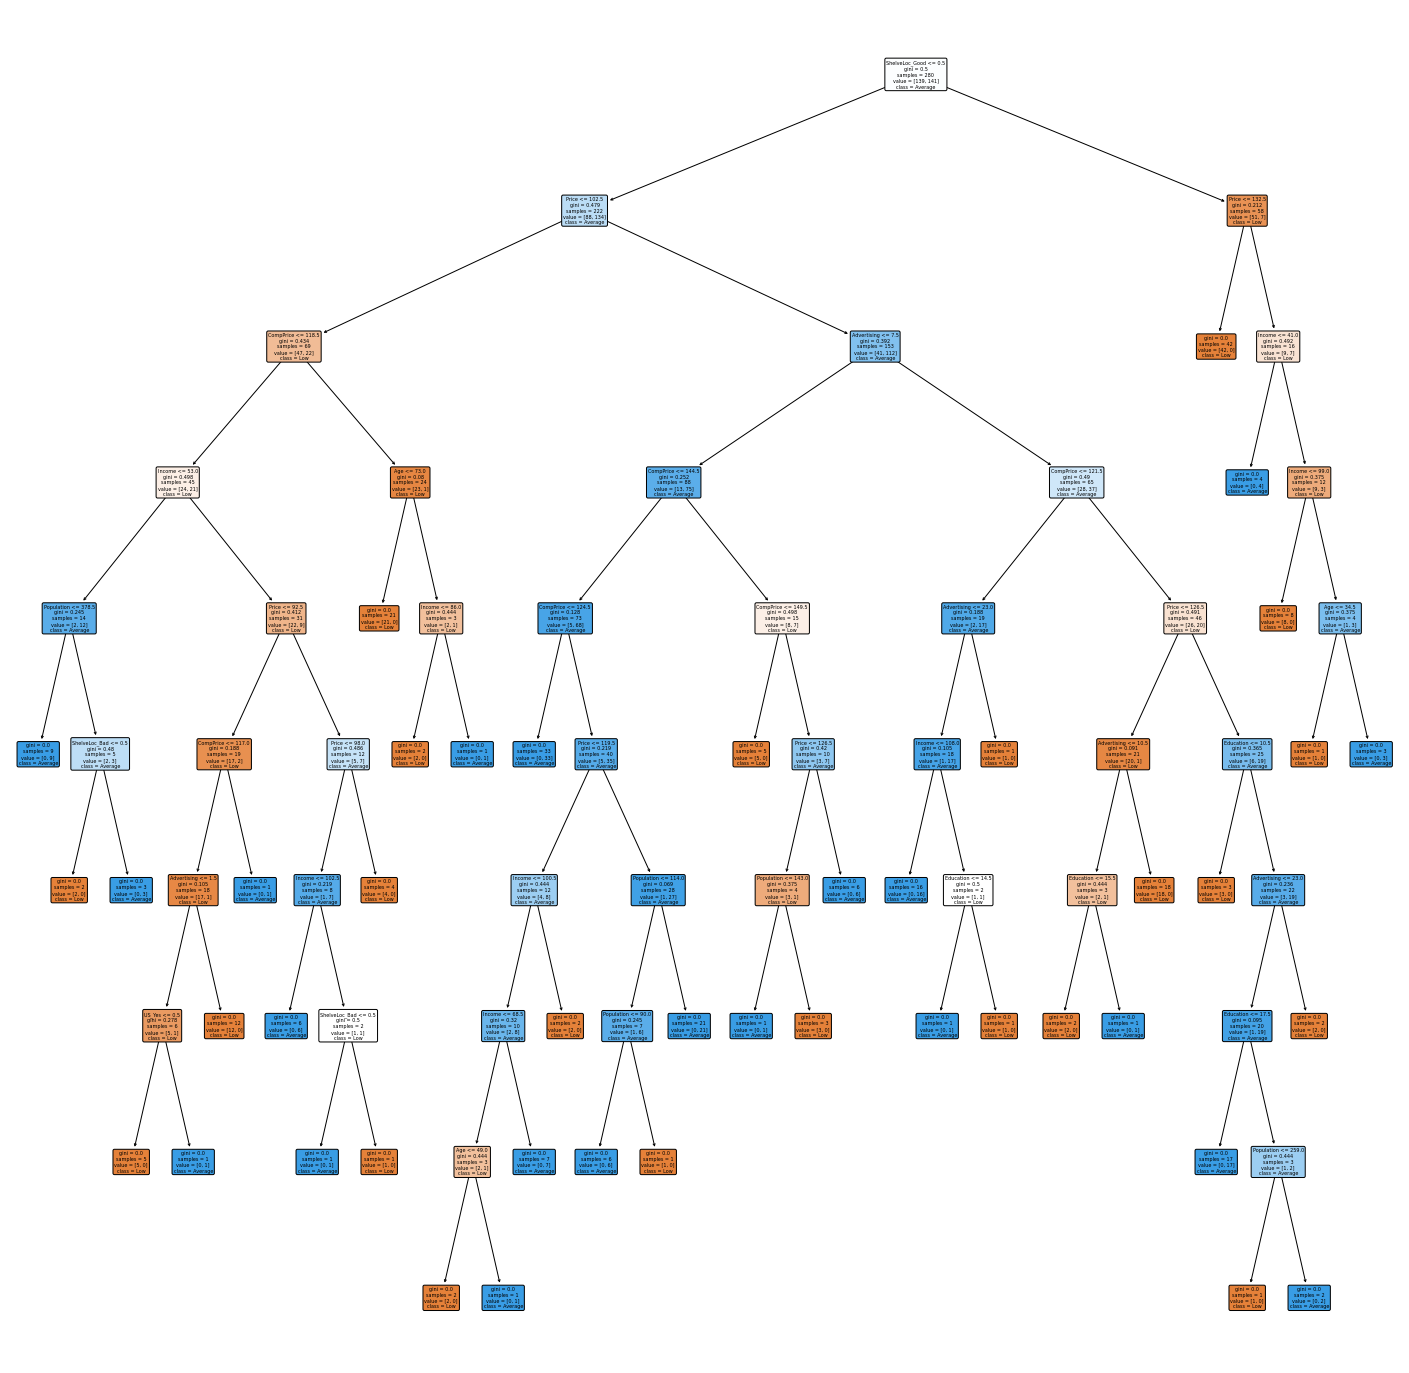

In [48]:
from sklearn.tree import plot_tree
plt.figure(figsize = (25,25))
plot_tree(tree, filled = True, rounded = True, feature_names = X.columns, class_names = ['Low', 'Average', 'High'])
plt.show()

In [49]:
pruning = tree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = pruning.ccp_alphas[:-1]
trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state = 42 , ccp_alpha = ccp_alpha, criterion ='gini')
    tree.fit(x_train, y_train)
    trees.append(tree)
ccp_alphas

array([0.        , 0.003125  , 0.00337302, 0.00337302, 0.00339286,
       0.00340136, 0.00342262, 0.00344388, 0.0047619 , 0.00535714,
       0.00535714, 0.00540461, 0.00603592, 0.00603592, 0.00612245,
       0.00964286, 0.01071429, 0.01166667, 0.01172078, 0.01205357,
       0.01329508, 0.01406494, 0.01584052, 0.01920484, 0.02116354,
       0.02769446, 0.05798956])

In [50]:
train_scores = [tree.score(x_train, y_train) for tree in trees]
test_scores = [tree.score(x_test, y_test) for tree in trees]

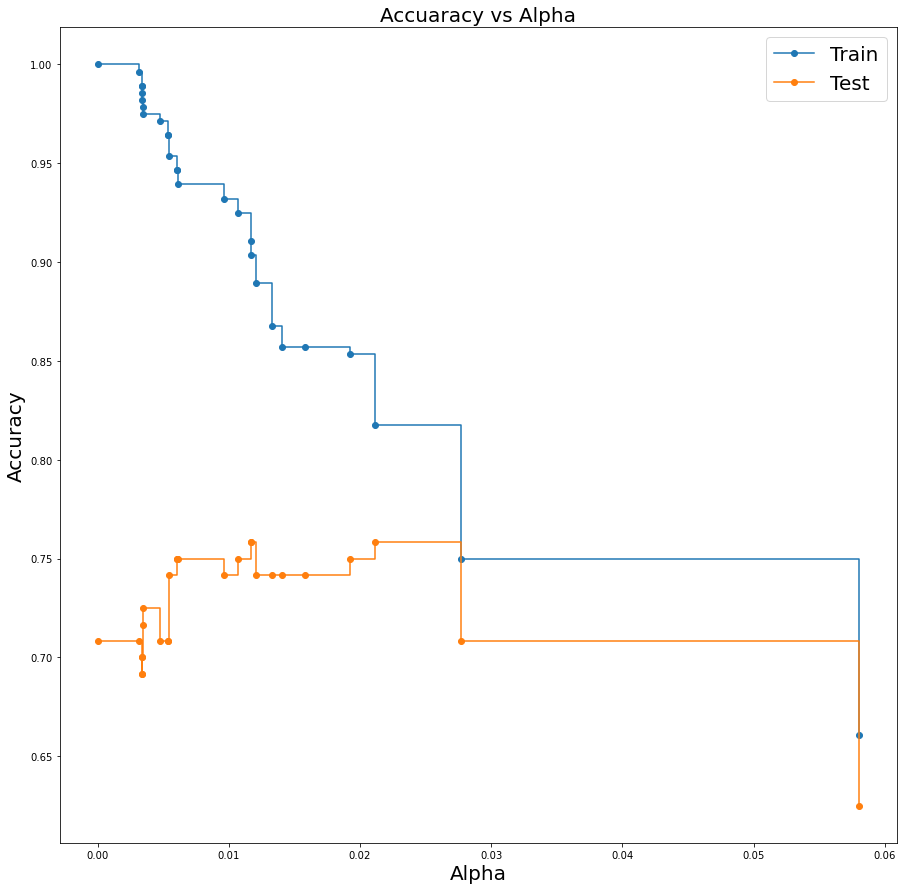

In [51]:
fig, ax = plt.subplots(figsize = (15,15))
ax.set_xlabel('Alpha', fontsize = 20)
ax.set_ylabel('Accuracy', fontsize = 20)
ax.set_title('Accuaracy vs Alpha', fontsize = 20)
ax.plot(ccp_alphas, train_scores, drawstyle = 'steps-post', marker = 'o', label = 'Train' )
ax.plot(ccp_alphas, test_scores, drawstyle = 'steps-post', marker = 'o', label = 'Test')
ax.legend(fontsize = 20)
plt.show()

In [53]:
kfold = KFold(10)
alpha_values = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state = 42, criterion = 'gini', ccp_alpha =  ccp_alpha)
    scores = cross_val_score(tree, x_train, y_train, cv = kfold)
    alpha_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
alpha_results = pd.DataFrame(alpha_values, columns = ['alpha', 'mean_accuracy', 'std'])
alpha_results

,alpha,mean_accuracy,std
0,0.000000,0.750000,0.087482
1,0.003125,0.750000,0.087482
2,0.003373,0.750000,0.087482
3,0.003373,0.750000,0.087482
4,0.003393,0.750000,0.087482
5,0.003401,0.750000,0.087482
6,0.003423,0.750000,0.087482
7,0.003444,0.750000,0.087482
8,0.004762,0.753571,0.088135
9,0.005357,0.760714,0.093200


<AxesSubplot:xlabel='alpha'>

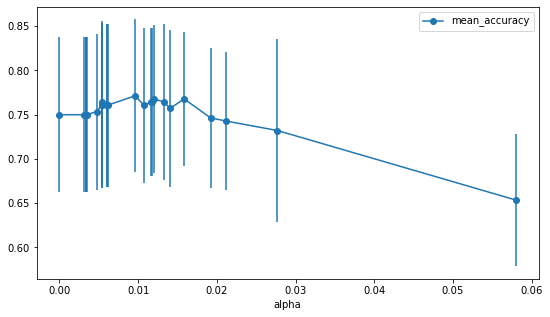

In [54]:
alpha_results.plot(x = 'alpha', y = 'mean_accuracy', yerr = 'std', marker = 'o')

In [55]:
accuracy_max = max(alpha_results['mean_accuracy'])
alpha_ideal = alpha_results[alpha_results['mean_accuracy'] == accuracy_max]

In [56]:
dot_data = StringIO()

In [57]:
export_graphviz(model,out_file = dot_data, filled =True, rounded = True, feature_names =predictors,class_names = target, impurity = False )

In [60]:
model.feature_importances_

array([0.19559416, 0.0969545 , 0.13550565, 0.02617525, 0.26555919,
       0.06864282, 0.01280357, 0.01392956, 0.12178157, 0.05591061,
       0.        , 0.        , 0.        , 0.00714312])

In [61]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [62]:
fi

,feature,importance
4,Price,0.265559
0,CompPrice,0.195594
2,Advertising,0.135506
8,ShelveLoc_Good,0.121782
1,Income,0.096954
5,Age,0.068643
9,ShelveLoc_Medium,0.055911
3,Population,0.026175
7,ShelveLoc_Bad,0.013930
6,Education,0.012804


price is most important factor